In [43]:
import pandas as pd 
import numpy as np 

In [62]:
file = './docs/Input_v2.xlsx'
df = pd.read_excel(file)
df.columns = [col.lower().strip().replace(' ', '_') for col in  df.columns]
df['birth_year'] = df['birth_year'].astype('Int64')

In [63]:
print(df.shape)
df.describe()

(100, 8)


,birth_year,assignment_a,assignment_b,mid_term_exam,project,final_exam
count,96.0,100.000000,100.00000,100.000000,100.000000,100.00000
mean,1980.479167,74.110000,74.78000,68.290000,79.450000,81.09000
std,12.896331,29.798276,20.27168,9.580383,9.997348,16.52063
min,1945.0,0.000000,0.00000,52.000000,60.000000,0.00000
25%,1967.0,63.000000,65.00000,63.000000,70.000000,75.00000
50%,1985.0,78.000000,78.00000,68.000000,80.000000,85.00000
75%,1988.0,94.000000,88.00000,72.000000,85.000000,93.00000
max,2000.0,208.000000,110.00000,103.000000,95.000000,99.00000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             100 non-null    object
 1   name           100 non-null    object
 2   birth_year     96 non-null     Int64 
 3   assignment_a   100 non-null    int64 
 4   assignment_b   100 non-null    int64 
 5   mid_term_exam  100 non-null    int64 
 6   project        100 non-null    int64 
 7   final_exam     100 non-null    int64 
dtypes: Int64(1), int64(5), object(2)
memory usage: 6.5+ KB


In [65]:
df.isnull().sum()

id               0
name             0
birth_year       4
assignment_a     0
assignment_b     0
mid_term_exam    0
project          0
final_exam       0
dtype: int64

In [66]:
# remove the null values 
df.dropna(inplace=True)

In [67]:
df.isnull().sum()

id               0
name             0
birth_year       0
assignment_a     0
assignment_b     0
mid_term_exam    0
project          0
final_exam       0
dtype: int64

# Question 1 
implement a group by age function. 

In [80]:
df.sort_values('birth_year', inplace=True)

In [81]:
df.head(10)

,id,name,birth_year,assignment_a,assignment_b,mid_term_exam,project,final_exam
33,F38,Arthur,1945,0,60,68,85,57
17,I67,Carl,1945,0,60,68,85,57
4,B45,Blake,1955,73,56,77,95,46
38,H53,Austin,1956,99,95,63,70,86
64,Q76,Kenway,1956,83,78,58,80,63
18,D39,Carlton,1956,56,56,72,85,54
78,T85,Grant,1957,208,90,68,70,81
84,P20,Guy,1965,94,88,72,85,92
44,I72,Jason,1965,78,110,68,70,81
1,I67,Bevis,1965,63,65,74,75,99


In [82]:
age_mapper = {}
for index, row in df.iterrows():
    age_mapper[row['name']] = row['birth_year']


In [83]:
age_mapper

{'Arthur': 1945,
 'Carl': 1945,
 'Blake': 1955,
 'Austin': 1956,
 'Kenway': 1956,
 'Carlton': 1956,
 'Grant': 1957,
 'Guy': 1965,
 'Jason': 1965,
 'Bevis': 1965,
 'Brandan': 1965,
 'Bowen': 1965,
 'Aubrey': 1965,
 'Keegan': 1965,
 'Kilby': 1965,
 'Jerome': 1965,
 'Grover': 1967,
 'Carrick': 1967,
 'Kiefer': 1967,
 'Hadwin': 1967,
 'Cary': 1967,
 'Ian': 1967,
 'Jarvis': 1967,
 'Cedric': 1967,
 'Jeffrey': 1967,
 'Kelsey': 1967,
 'Kimball': 1967,
 'Hale': 1967,
 'Blair': 1974,
 'Atwater': 1977,
 'Kenneth, Ken': 1978,
 'Arlen': 1978,
 'Bond': 1978,
 'Gregory': 1980,
 'Grayson': 1982,
 'Igor': 1983,
 'Kendrick': 1984,
 'Blaine': 1984,
 'Archibald': 1984,
 'Boris': 1984,
 'Jesse': 1984,
 'Braden': 1984,
 'Hamlin': 1984,
 'Jed': 1985,
 'Kim': 1985,
 'Jacob': 1985,
 'John': 1985,
 'Jonathan': 1985,
 'Kerwin': 1985,
 'Bert': 1985,
 'Bradley': 1985,
 'Jeremiah': 1985,
 'Cecil': 1985,
 'Caldwell': 1985,
 'Hadley': 1985,
 'Atwood': 1985,
 'Arnold': 1985,
 'Carter': 1985,
 'Calvert': 1985,
 'Halden

In [99]:
def group_by_age(age_mapper: dict[str, int]):
    gba_mapper, index, temp = {}, 0, 0
    for name, year in age_mapper.items():
        if year == temp: 
            gba_mapper[index].append(name) 
        else: 
            index+=1
            gba_mapper[index] = [name]               
        temp = year
    return gba_mapper

In [92]:
group_by_age(age_mapper)

{1: ['Arthur', 'Carl'],
 2: ['Blake'],
 3: ['Austin', 'Kenway', 'Carlton'],
 4: ['Grant'],
 5: ['Guy',
  'Jason',
  'Bevis',
  'Brandan',
  'Bowen',
  'Aubrey',
  'Keegan',
  'Kilby',
  'Jerome'],
 6: ['Grover',
  'Carrick',
  'Kiefer',
  'Hadwin',
  'Cary',
  'Ian',
  'Jarvis',
  'Cedric',
  'Jeffrey',
  'Kelsey',
  'Kimball',
  'Hale'],
 7: ['Blair'],
 8: ['Atwater'],
 9: ['Kenneth, Ken', 'Arlen', 'Bond'],
 10: ['Gregory'],
 11: ['Grayson'],
 12: ['Igor'],
 13: ['Kendrick', 'Blaine', 'Archibald', 'Boris', 'Jesse', 'Braden', 'Hamlin'],
 14: ['Jed',
  'Kim',
  'Jacob',
  'John',
  'Jonathan',
  'Kerwin',
  'Bert',
  'Bradley',
  'Jeremiah',
  'Cecil',
  'Caldwell',
  'Hadley',
  'Atwood',
  'Arnold',
  'Carter',
  'Calvert',
  'Halden',
  'Gresham',
  'Kent',
  'Keith'],
 15: ['Kevin', 'Carver', 'James', 'Griswald'],
 16: ['Keaton', 'Casper', 'Halbert', 'Hadden', 'Kilian', 'Jasper'],
 17: ['Isaac'],
 18: ['Kenyon', 'Kane', 'Caleb', 'Carney'],
 19: ['Jack', 'Kerry', 'Carroll'],
 20: ['K

# Question 2 
List the names in which one of the letters ‘a’, ‘e’, or ‘i’ is located exactly in the middle of that name. 

In [117]:
name_list = df.name.to_list()


def middle_vowel_names(names: list[str]):
    vowel = ['a', 'e', 'i', 'o', 'u']
    return [name for name in names if (len(name)%2!=0 and name[int(len(name)/2)] in vowel )]
    

In [119]:
middle_vowel_names(name_list)

['Blake',
 'Grant',
 'Guy',
 'Ian',
 'Blair',
 'Atwater',
 'Archibald',
 'Jed',
 'Kim',
 'Keith',
 'Isaac',
 'Keene',
 'Avery']

# Question 3 
Recode the people with age < 18 as TEENAGER, 18 <=  age < 40 as YOUNG, age >= 40 as OLD in a column called AGE_GROUP

In [126]:
from datetime import datetime

def age_group_converter(value):
    age = datetime.now().year - value
    if age < 18: 
        return 'TEENAGER'
    elif 18 <= age <= 40:
        return 'YOUNG'
    elif age >= 40: 
        return 'OLD'



In [128]:
df['age_group'] = df['birth_year'].apply(age_group_converter)

# Question 4
Check for duplicate IDs 

In [150]:
duplicates = df['id'][df['id'].duplicated()].to_list()
duplicates

['I67', 'G56', 'A68', 'J29', 'Q28']

In [146]:
df[df['id'] == 'A68']

,id,name,birth_year,assignment_a,assignment_b,mid_term_exam,project,final_exam,age_group
3,A68,Blair,1974,90,73,59,85,94,OLD
13,A68,Caldwell,1985,78,90,68,70,81,YOUNG


# Question 5 
Calculate the average of each age group and add its value to a column called average and save it in .csv file with the names and birthyears and ages. (columns of output file: ID, NAME, BIRTHYEAR, AGE, AGE_GROUP, AVERAGE)   

In [152]:
def age_calculator(value):
    return datetime.now().year - value

df['age'] = df['birth_year'].apply(age_calculator)

In [156]:
df[df['age_group']=='OLD']['age'].mean()

57.114285714285714

In [157]:
def avg_age_calculator(value):
    return int(df[df['age_group']==value]['age'].mean())

df['average'] = df['age_group'].apply(avg_age_calculator)

In [164]:
df

,id,name,birth_year,assignment_a,assignment_b,mid_term_exam,project,final_exam,age_group,age,average
33,F38,Arthur,1945,0,60,68,85,57,OLD,78,57
17,I67,Carl,1945,0,60,68,85,57,OLD,78,57
4,B45,Blake,1955,73,56,77,95,46,OLD,68,57
38,H53,Austin,1956,99,95,63,70,86,OLD,67,57
64,Q76,Kenway,1956,83,78,58,80,63,OLD,67,57
...,...,...,...,...,...,...,...,...,...,...,...
93,F10,Halsey,2000,92,72,61,85,96,YOUNG,23,34
75,S20,Kirby,2000,95,88,71,60,93,YOUNG,23,34
39,H25,Avery,2000,99,95,63,70,86,YOUNG,23,34
29,E81,Archer,2000,58,70,66,90,95,YOUNG,23,34


In [166]:
columns_to_include = ['id', 'name', 'birth_year', 'age', 'age_group', 'average']
df_ = df[columns_to_include]

In [167]:
df_

,id,name,birth_year,age,age_group,average
33,F38,Arthur,1945,78,OLD,57
17,I67,Carl,1945,78,OLD,57
4,B45,Blake,1955,68,OLD,57
38,H53,Austin,1956,67,OLD,57
64,Q76,Kenway,1956,67,OLD,57
...,...,...,...,...,...,...
93,F10,Halsey,2000,23,YOUNG,34
75,S20,Kirby,2000,23,YOUNG,34
39,H25,Avery,2000,23,YOUNG,34
29,E81,Archer,2000,23,YOUNG,34


# Question 6 
Calculate the weighted average of students’ grades applying the following weights:  
a.	Assignment A: 7%  
b.	Assignment B: 13%  
c.	Mid-Term Exam: 20%  
d.	Project: 25%  
e.	Final Exam: 35%  
Add the result to ‘GRADE’ column inside the file generated in question 5.


In [181]:
def grade_calculator(a:int, b:int, mid:int, project:int, final:int):
    a = (a/100*7) if a != 0 else 0
    b = (b/100*13) if b != 0 else 0  
    mid = (mid/100*20) if mid != 0 else 0   
    project = (project/100*25) if project != 0 else 0   
    final = (final/100*35) if final != 0 else 0 
    return a + b + mid + project + final 



In [183]:
# df['grade'] = (map(grade_calculator, 
#                     df['assignment_a'], 
#                     df['assignment_b'],
#                     df['mid_term_exam'],
#                     df['project'],
#                     df['final_exam']
#                     )
#                 )

df['grade']= df.apply(lambda row: grade_calculator(row['assignment_a'],                                         
                                                    row['assignment_b'],
                                                    row['mid_term_exam'],
                                                    row['project'],
                                                    row['final_exam']
                                                    ), 
                                                    axis=1
                                                )   

In [186]:
columns_to_include.append('grade')
df_ = df[columns_to_include]
df_.head()

,id,name,birth_year,age,age_group,average,grade
33,F38,Arthur,1945,78,OLD,57,62.60
17,I67,Carl,1945,78,OLD,57,62.60
4,B45,Blake,1955,68,OLD,57,67.64
38,H53,Austin,1956,67,OLD,57,79.48
64,Q76,Kenway,1956,67,OLD,57,69.60


In [187]:
df_.to_csv('./output/final_output.csv', index=False)

In [190]:
df.to_csv('./output/complete_final_output.csv', index=False)

# Question 7 
Implement a function to draw a chart to show the trend of every student during the semester.  

In [193]:
import matplotlib.pyplot as plt
import numpy as np


In [200]:
df['combined'] = df.apply(lambda row: [row['assignment_a'], row['assignment_b'], row['mid_term_exam'], row['project'], row['final_exam']], axis=1)

In [201]:
# List of exam names
exam_names = ['assignment_a', 'assignment_b', 'mid_term_exam', 'project', 'final_exam']
def plot_student_grade_trend(data, student_name):
    # Find the row for the specified student name
    student_data = data[data['name'] == student_name]
    
    if student_data.empty:
        print(f"Student '{student_name}' not found in the DataFrame.")
        return
    
    # Get the grades for the specified student
    grades = student_data['combined'].iloc[0]
    
    # Create a new subplot for the specified student
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Plot the trend for the specified student
    x = range(1, len(grades) + 1)  # Create x values (1, 2, 3, ...)
    ax.plot(x, grades, marker='o')
    
    ax.set_xlabel('Exams')
    ax.set_ylabel('Grades')
    ax.set_title(f'Student Grade Trend - {student_name}')
    ax.set_ylim(0, 110)  # Set the y-axis limits (0-110)
    
    # Set the x-axis labels to be exam names
    ax.set_xticks(x)
    ax.set_xticklabels(exam_names)
    
    # Add exam names as labels for each point
    for i, grade in enumerate(grades):
        ax.text(x[i], grade, exam_names[i], ha='center', va='bottom')
    
    # Show the individual plot for the specified student
    plt.grid()
    plt.show()

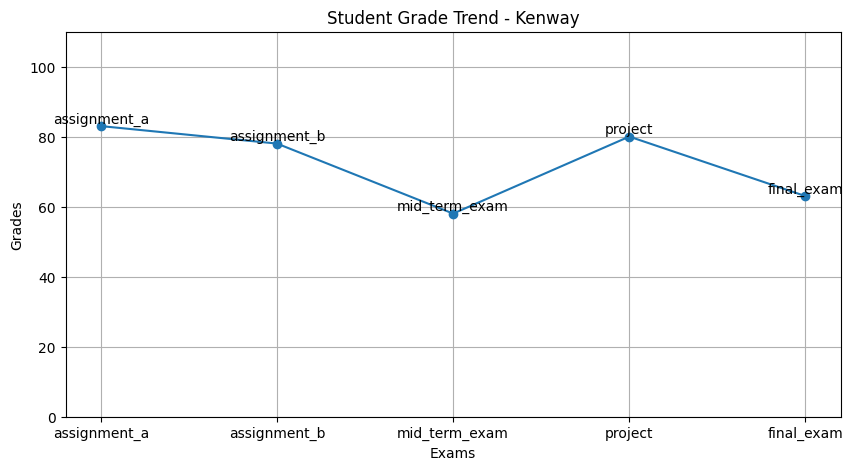

In [203]:
plot_student_grade_trend(df, 'Kenway')